In [1]:
import datetime as dt
print("Welcome to Data Bootcamp!")
print("Today's date is:", dt.date.today())


Welcome to Data Bootcamp!
Today's date is: 2017-05-06


Missy Allan 
Data Bootcamp Sandbox for playing around with Jupyter notebooks 

In [8]:
import pandas as pd
url1 = 'https://raw.githubusercontent.com/NYUDataBootcamp'
url2 = '/Materials/master/Data/test.xls'
url  = url1 + url2
dfx = pd.read_excel(url)
print('\n', dfx)




       name  x1  x2   x3
0     Dave   1   2  3.5
1    Chase   4   3  4.3
2  Spencer   5   6  7.8


In [16]:
url1 = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/'
url2 = 'college-majors/recent-grads.csv'
url = url1 + url2
df538 = pd.read_csv(url)
print('\n', df538)


      Rank  Major_code                                          Major  \
0       1        2419                          PETROLEUM ENGINEERING   
1       2        2416                 MINING AND MINERAL ENGINEERING   
2       3        2415                      METALLURGICAL ENGINEERING   
3       4        2417      NAVAL ARCHITECTURE AND MARINE ENGINEERING   
4       5        2405                           CHEMICAL ENGINEERING   
5       6        2418                            NUCLEAR ENGINEERING   
6       7        6202                              ACTUARIAL SCIENCE   
7       8        5001                     ASTRONOMY AND ASTROPHYSICS   
8       9        2414                         MECHANICAL ENGINEERING   
9      10        2408                         ELECTRICAL ENGINEERING   
10     11        2407                           COMPUTER ENGINEERING   
11     12        2401                          AEROSPACE ENGINEERING   
12     13        2404                         BIOMEDICAL ENGIN

In [20]:
print?

In [57]:
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web
len(get_available_datasets())
ff = web.DataReader('F-F_Research_Data_factors', 'famafrench')[1]
ff.columns = ['xsm', 'smb', 'hml', 'rf']
ff['rm'] = ff['xsm'] + ff['rf']
ff = ff[['rm', 'rf']]               # extract rm (market) and rf (riskfree)
ff.head(5)


,rm,rf
Date,,
2010,17.49,0.12
2011,0.48,0.04
2012,16.34,0.06
2013,35.22,0.02
2014,11.72,0.02


In [49]:
gdp  = [13271.1, 13773.5, 14234.2, 14613.8, 14873.7, 14830.4, 14418.7,
        14783.8, 15020.6, 15369.2, 15710.3]
pce  = [8867.6, 9208.2, 9531.8, 9821.7, 10041.6, 10007.2, 9847.0, 10036.3,
        10263.5, 10449.7, 10699.7]
year = list(range(2003,2014))        # use range for years 2003-2013

# Note that we set the index
us = pd.DataFrame({'gdp': gdp, 'pce': pce}, index=year)
print(us)

          gdp      pce
2003  13271.1   8867.6
2004  13773.5   9208.2
2005  14234.2   9531.8
2006  14613.8   9821.7
2007  14873.7  10041.6
2008  14830.4  10007.2
2009  14418.7   9847.0
2010  14783.8  10036.3
2011  15020.6  10263.5
2012  15369.2  10449.7
2013  15710.3  10699.7


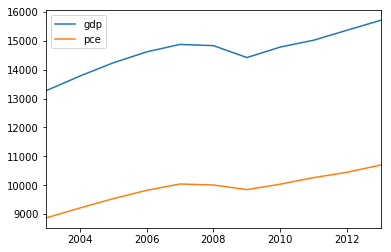

In [50]:
us.plot()

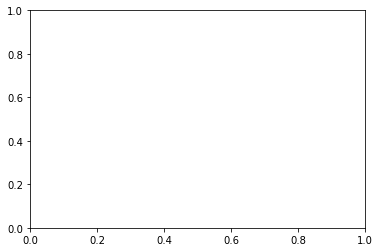

In [51]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots() #Create fig and ax objects



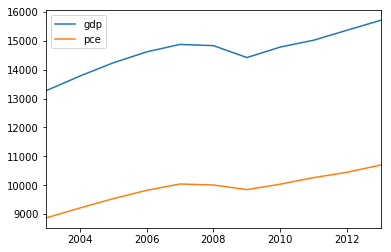

In [53]:
fig, axe = plt.subplots()
us.plot(ax = axe) #ax = look for axis object, axe is it 


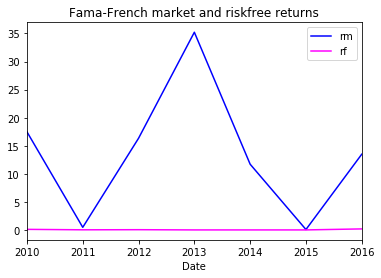

In [58]:
fig, ax = plt.subplots()
ff.plot(ax=ax,
        kind='line',                 # line plot
        color=['blue', 'magenta'],   # line color
        title='Fama-French market and riskfree returns')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11836bdd8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x117933eb8>], dtype=object)

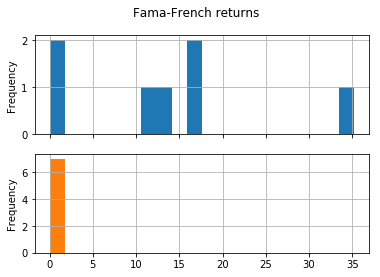

In [63]:
ff.plot(kind= 'hist', bins=20, subplots= True, title='Fama-French returns',grid=True, legend=False)

In [64]:
#Use wbdf to create a histogram of gdpc
code    = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']
country = ['United States', 'France', 'Japan', 'China', 'India',
             'Brazil', 'Mexico']
gdppc   = [53.1, 36.9, 36.3, 11.9, 5.4, 15.0, 16.5]

wbdf = pd.DataFrame({'gdppc': gdppc, 'country': country}, index=code)
wbdf


,country,gdppc
USA,United States,53.1
FRA,France,36.9
JPN,Japan,36.3
CHN,China,11.9
IND,India,5.4
BRA,Brazil,15.0
MEX,Mexico,16.5


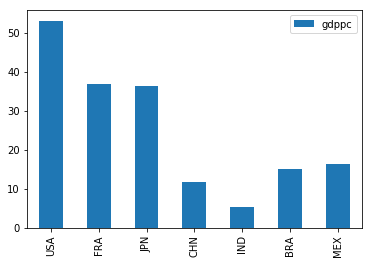

In [66]:
wbdf.plot(kind='bar')
#gdpc from world bank 

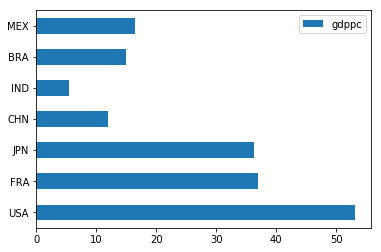

In [67]:
wbdf.plot(kind='barh')

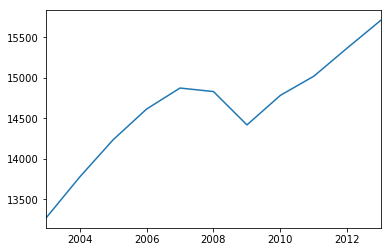

In [68]:
#Method 1 - Apply plot methods directly to dataframes 
us['gdp'].plot()

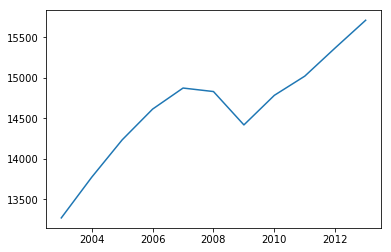

In [69]:
#Method 2 = Use plot(x, y) function 
plt.plot(us.index, us['gdp'])


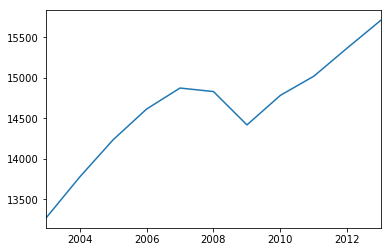

In [70]:
#Method 3 Create fig, ax objects and apply methods to them
fig, ax = plt.subplots()
us['gdp'].plot(ax=ax)



/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'G' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'D' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'P' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


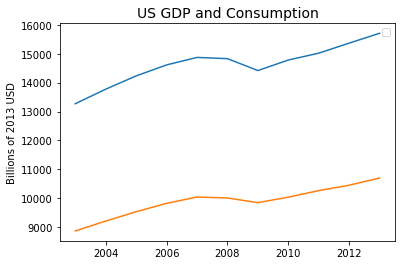

In [74]:
#Adding things to graphs
fig, ax = plt.subplots()
us.plot(ax=ax)
ax.set_title('US GDP and Consumption', fontsize = 14, loc='center')
ax.set_ylabel('Billions of 2013 USD')
ax.legend('GDP', 'Consumption')
ax.set_xlim(2002.5, 2013.5)
ax.tick_params(labelcolor= 'black')


Object ax has dimension 2


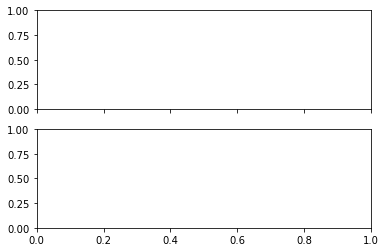

In [75]:
#Create multiple plots 
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
print('Object ax has dimension', len(ax))


In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, sharex= True)
us['gdp'].plot(ax= ax[0], co)